In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/irit/Documents/Myeloma_Syrine/Scripts')  # Add the path to the project directory
from Scripts import xgboost_model,SVM_model,Lin_model,process_data, dim_reduction, DEanalysis
import importlib
import seaborn as sns
import umap

2023-08-17 15:50:18.264786: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 15:50:18.482161: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 15:50:18.483367: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 15:50:21.125230: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
genes_ensg=pd.read_csv('final_selection_ENSG.csv')['0']

In [9]:
genes_ensg

0     ENSG00000249053
1     ENSG00000248869
2     ENSG00000165443
3     ENSG00000234816
4     ENSG00000235235
           ...       
92    ENSG00000211966
93    ENSG00000264424
94    ENSG00000236849
95    ENSG00000070985
96    ENSG00000183090
Name: 0, Length: 97, dtype: object

In [44]:
X,y=process_data.main('/home/irit/Documents/Myeloma_Syrine/Data/raw_count_mrd_response.csv',0,0,0,'None')

In [74]:
counts_n=X[genes_ensg.values][y==0]
counts_p=X[genes_ensg.values][y==1]

In [42]:
counts_n.describe()

,ENSG00000249053,ENSG00000248869,ENSG00000165443,ENSG00000234816,ENSG00000235235,ENSG00000233309,ENSG00000166482,ENSG00000259641,ENSG00000145284,ENSG00000245750,...,ENSG00000260992,ENSG00000234432,ENSG00000111181,ENSG00000211907,ENSG00000236718,ENSG00000211966,ENSG00000264424,ENSG00000236849,ENSG00000070985,ENSG00000183090
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.217825,0.115979,0.009524,1.179639,5.360917,0.109857,6.814687,0.050532,3.697891,0.277160,...,1.934581,0.058989,0.516443,24.654619,0.142334,22.534843,0.025012,1.407780,0.212430,0.203733
std,1.054227,0.413463,0.046507,2.234013,74.405326,0.493878,46.327005,0.077198,5.579580,0.436236,...,1.546615,0.215087,1.606584,149.674591,1.189052,307.750523,0.087797,4.504671,0.509440,0.619836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007208,0.000000,...,0.043402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.159852,0.000000,0.000000,0.063636,0.000000,0.620349,0.072114,...,0.817666,0.000000,0.038432,0.000000,0.000000,0.000000,0.000000,0.000000,0.020414,0.022118
50%,0.000000,0.000000,0.000000,0.515316,0.000000,0.000000,0.128436,0.024409,1.590703,0.173991,...,1.514162,0.020161,0.105638,0.000000,0.000000,0.000000,0.000000,0.058305,0.062808,0.055589
75%,0.064421,0.033072,0.000000,1.177257,0.000000,0.000000,0.270356,0.068295,4.374182,0.295207,...,2.525403,0.052015,0.278753,0.000000,0.000000,0.101183,0.011973,0.335987,0.171952,0.141626
max,16.138137,4.179529,0.651340,21.400739,1274.680573,4.974563,571.474605,0.647333,47.751617,5.674011,...,8.063055,3.234241,18.363619,1404.873343,19.465501,5312.954896,1.022405,32.616219,4.519655,7.957220


In [43]:
counts_p.describe()

,ENSG00000249053,ENSG00000248869,ENSG00000165443,ENSG00000234816,ENSG00000235235,ENSG00000233309,ENSG00000166482,ENSG00000259641,ENSG00000145284,ENSG00000245750,...,ENSG00000260992,ENSG00000234432,ENSG00000111181,ENSG00000211907,ENSG00000236718,ENSG00000211966,ENSG00000264424,ENSG00000236849,ENSG00000070985,ENSG00000183090
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,0.082133,0.045878,0.087268,0.685001,0.586465,0.057453,0.375208,0.030992,6.884448,0.168006,...,2.780576,0.289228,0.220389,23.022116,0.069101,144.809110,0.008468,0.806615,0.510580,0.651588
std,0.395059,0.242618,0.829668,0.956313,5.541216,0.436041,1.048428,0.048785,13.255875,0.164915,...,2.892013,1.552855,0.464699,177.556912,0.612456,1605.213838,0.037182,3.817413,1.731532,2.380009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.107856,0.000000,0.000000,0.055181,0.000000,0.894774,0.059387,...,1.121871,0.000000,0.022071,0.000000,0.000000,0.000000,0.000000,0.000000,0.027408,0.024977
50%,0.000000,0.000000,0.000000,0.350060,0.000000,0.000000,0.121116,0.015346,3.411975,0.119600,...,1.941821,0.029732,0.077107,0.000000,0.000000,0.000000,0.000000,0.000000,0.080646,0.060310
75%,0.000000,0.000000,0.001419,0.873889,0.000000,0.000000,0.245251,0.036636,7.057895,0.210630,...,3.546656,0.083797,0.208193,0.000000,0.000000,0.073065,0.000000,0.134451,0.206326,0.222588
max,5.591991,2.926842,13.676854,6.553607,82.829211,6.825028,9.957235,0.368643,140.250734,1.005043,...,25.599818,17.129910,3.974689,2084.968063,8.930645,20090.781575,0.546344,34.190481,16.214216,31.849451


In [45]:
log_counts_n=np.log(1+X[genes_ensg.values][y==0])

In [46]:
log_counts_p=np.log(1+X[genes_ensg.values][y==1])

In [53]:
Coress=pd.read_csv('/home/irit/Documents/Myeloma/Utilities/genes_correspondance_id_name.txt',index_col='Gene_id')
dict_coress={k:v[0] for (k,v) in zip(Coress.index,Coress.values)}

In [69]:
dict_coress

{'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1',
 'ENSG00000198888': 'MT-ND1',
 'ENSG00000210100': 'MT-TI',
 'ENSG00000210107': 'MT-TQ',
 'ENSG00000210112': 'MT-TM',
 'ENSG00000198763': 'MT-ND2',
 'ENSG00000210117': 'MT-TW',
 'ENSG00000210127': 'MT-TA',
 'ENSG00000210135': 'MT-TN',
 'ENSG00000210140': 'MT-TC',
 'ENSG00000210144': 'MT-TY',
 'ENSG00000198804': 'MT-CO1',
 'ENSG00000210151': 'MT-TS1',
 'ENSG00000210154': 'MT-TD',
 'ENSG00000198712': 'MT-CO2',
 'ENSG00000210156': 'MT-TK',
 'ENSG00000228253': 'MT-ATP8',
 'ENSG00000198899': 'MT-ATP6',
 'ENSG00000198938': 'MT-CO3',
 'ENSG00000210164': 'MT-TG',
 'ENSG00000198840': 'MT-ND3',
 'ENSG00000210174': 'MT-TR',
 'ENSG00000212907': 'MT-ND4L',
 'ENSG00000198886': 'MT-ND4',
 'ENSG00000210176': 'MT-TH',
 'ENSG00000210184': 'MT-TS2',
 'ENSG00000210191': 'MT-TL2',
 'ENSG00000198786': 'MT-ND5',
 'ENSG00000198695': 'MT-ND6',
 'ENSG00000210194': 

In [60]:

def convert_to_name(list_ids):
    return list( map(dict_coress.get, list_ids) )

In [65]:
str(convert_to_name(['ENSG00000259641'])[0])

'None'

In [66]:

def analyse_selecte_genes(X,y):
    counts_plus=np.log(1+X[genes_ensg.values][y==1])
    counts_neg=np.log(1+X[genes_ensg.values][y==0])
    for g in genes_ensg.values:
        plt.figure(figsize=(10,10))
        plt.title('gene ' + str(g)+ ' '+str(convert_to_name([g])[0]))
        plt.boxplot([counts_plus[g],counts_neg[g]],labels=['MRD+','MRD-'])
        title='/home/irit/Documents/Myeloma_Syrine/selected_genes_analysis/'+str(g)+'.png'
        plt.savefig(title, dpi=300)


In [ ]:
analyse_selecte_genes(X,y)

In [82]:
X_reordered=pd.concat([log_counts_n,log_counts_p],axis=0)

In [83]:
X_reordered

,ENSG00000249053,ENSG00000248869,ENSG00000165443,ENSG00000234816,ENSG00000235235,ENSG00000233309,ENSG00000166482,ENSG00000259641,ENSG00000145284,ENSG00000245750,...,ENSG00000260992,ENSG00000234432,ENSG00000111181,ENSG00000211907,ENSG00000236718,ENSG00000211966,ENSG00000264424,ENSG00000236849,ENSG00000070985,ENSG00000183090
patient_id,,,,,,,,,,,,,,,,,,,,,
034-28,0.000000,0.000000,0.000000,2.639057,0.000000,0.000000,2.302585,1.098612,4.836282,2.302585,...,2.197225,0.000000,2.564949,0.000000,0.0,0.000000,0.693147,1.609438,0.000000,2.079442
147-01,0.000000,0.693147,0.000000,1.386294,0.000000,0.000000,6.602588,0.000000,4.248495,2.079442,...,3.367296,0.000000,6.349139,0.000000,0.0,0.693147,0.000000,0.000000,0.000000,0.000000
056-14,1.098612,0.000000,0.000000,2.708050,0.000000,1.386294,0.693147,0.000000,5.948035,2.772589,...,3.496508,1.098612,2.564949,0.000000,0.0,0.000000,0.000000,0.693147,1.386294,2.397895
009-20,1.098612,1.386294,0.000000,1.791759,0.000000,0.000000,2.197225,0.000000,1.791759,2.639057,...,3.663562,1.098612,4.369448,1.098612,0.0,0.000000,0.000000,0.000000,1.098612,1.945910
025-08,0.000000,0.000000,0.000000,1.609438,0.000000,0.000000,1.098612,1.098612,5.062595,1.945910,...,4.127134,1.609438,3.496508,0.000000,0.0,0.000000,0.000000,1.098612,3.496508,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
050-03,0.000000,0.000000,4.812184,1.098612,0.000000,0.000000,1.945910,0.000000,5.717028,0.693147,...,4.204693,2.079442,2.564949,0.000000,0.0,1.386294,0.000000,0.000000,1.386294,4.394449
104-12,0.000000,0.000000,1.609438,1.098612,0.000000,0.000000,2.944439,0.000000,5.062595,3.091042,...,4.060443,1.945910,5.214936,0.000000,0.0,0.693147,0.000000,0.000000,2.708050,6.218600
046-04,0.000000,0.000000,0.000000,1.945910,2.079442,0.000000,1.098612,0.693147,5.231109,1.945910,...,1.945910,1.609438,1.609438,0.000000,0.0,0.000000,0.000000,1.386294,0.693147,1.098612


In [105]:
X_tpm,y=process_data.main('/home/irit/Documents/Myeloma_Syrine/Data/TPM_count_mrd_response.csv',0,0,0,'None')

In [112]:
X_tpm=process_data.scale_data(X_tpm,'Max')

In [113]:
reducer=umap.UMAP(n_components=2)

In [114]:
embedding=reducer.fit_transform(X_tpm[genes_ensg.values])

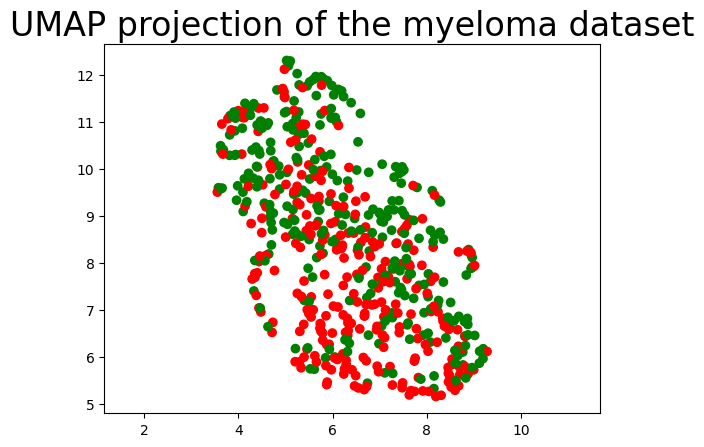

In [115]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=['g' if l==0 else 'r' for l in y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the myeloma dataset', fontsize=24);

In [129]:
model=xgboost_model.xgb_classification(pd.DataFrame(embedding,index=X.index,columns=['c1','c2']),y,10)

In [132]:
model[1]['Accuracy'].mean()

0.6479251899473992

In [133]:
model[1]['Accuracy'].std()

0.06403512029965965